In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Demand Driven Aggregate Geotype Cost

In [49]:
df = pd.read_csv('data/demand_driven_aggregate_geotype_cost.csv')

In [38]:
df.head()

,strategy,scenario,geotype,area_km2,cost,RAN.macro,RAN.small.cells,backhaul.macro,civil.works.macro,civil.works.small
0,Hybrid,Scenario 1 (30 Mbps),Rural 1,3129.0,2.179056e+08,60436781.34,22373478.18,3409691.472,15343611.62,116342086.5
1,Small Cells,Scenario 1 (30 Mbps),Rural 1,3129.0,1.387156e+08,0.00,22373478.18,0.000,0.00,116342086.5
2,Spectrum Integration,Scenario 1 (30 Mbps),Rural 1,3129.0,7.919008e+07,60436781.34,0.00,3409691.472,15343611.62,0.0
3,Hybrid,Scenario 2 (100 Mbps),Rural 1,3129.0,2.179056e+08,60436781.34,22373478.18,3409691.472,15343611.62,116342086.5
4,Small Cells,Scenario 2 (100 Mbps),Rural 1,3129.0,1.387156e+08,0.00,22373478.18,0.000,0.00,116342086.5


In [30]:
df.isnull().sum()

strategy             0
scenario             0
geotype              0
area_km2             0
cost                 0
RAN.macro            0
RAN.small.cells      0
backhaul.macro       0
civil.works.macro    0
civil.works.small    0
dtype: int64

In [31]:
df.geotype.unique()

array(['Rural 1', 'Rural 2', 'Rural 3', 'Rural 4', 'Suburban 1',
       'Suburban 2', 'Urban'], dtype=object)

In [32]:
df.area_km2.unique()

array([ 3129. ,  3480.7,  6411.1, 19805. ,   634.8,  1199.4,   158. ])

    Using population density data from the demand module, postcodes statistical units are grouped based on a set of boundaries representing different percentiles of the population. Seven settlement types are used including 
    
- **Urban**  (≥7348 persons per km2), 
- **Suburban 1**  (≥4046 persons per km2), 
- **Suburban 2**   (≥1949 persons per km2), 
- **Rural 1**   (≥672 persons per km2), 
- **Rural 2**   (≥346 persons per km2), 
- **Rural 3**   (≥191 persons per km2),
- **Rural 4**   (≥0 persons per km2)


In [50]:
# Sort the values 
sorted_df = df.sort_values(by=['cost'],ascending=False)

In [51]:
sorted_df.loc[:, "cost"] ='€'+ sorted_df["cost"].map('{:,.0f}'.format)

In [54]:
sorted_df.head(10)

,strategy,scenario,geotype,area_km2,cost,RAN.macro,RAN.small.cells,backhaul.macro,civil.works.macro,civil.works.small
33,Hybrid,Scenario 3 (300 Mbps),Rural 4,19805.0,"€776,462,626",1.054453e+08,96714496.95,4.461718e+07,2.677031e+07,502915384.1
30,Hybrid,Scenario 2 (100 Mbps),Rural 4,19805.0,"€776,462,626",1.054453e+08,96714496.95,4.461718e+07,2.677031e+07,502915384.1
31,Small Cells,Scenario 2 (100 Mbps),Rural 4,19805.0,"€599,629,881",0.000000e+00,96714496.95,0.000000e+00,0.000000e+00,502915384.1
34,Small Cells,Scenario 3 (300 Mbps),Rural 4,19805.0,"€599,629,881",0.000000e+00,96714496.95,0.000000e+00,0.000000e+00,502915384.1
18,Hybrid,Scenario 1 (30 Mbps),Rural 3,6411.1,"€336,402,496",3.800797e+07,44496649.90,1.286588e+07,9.649414e+06,231382579.5
24,Hybrid,Scenario 3 (300 Mbps),Rural 3,6411.1,"€336,402,496",3.800797e+07,44496649.90,1.286588e+07,9.649414e+06,231382579.5
21,Hybrid,Scenario 2 (100 Mbps),Rural 3,6411.1,"€336,402,496",3.800797e+07,44496649.90,1.286588e+07,9.649414e+06,231382579.5
6,Hybrid,Scenario 3 (300 Mbps),Rural 1,3129.0,"€315,525,854",6.043678e+07,38118672.55,3.409691e+06,1.534361e+07,198217097.3
51,Hybrid,Scenario 3 (300 Mbps),Suburban 2,1199.4,"€286,289,941",4.216866e+07,37647670.99,0.000000e+00,1.070572e+07,195767889.1
42,Hybrid,Scenario 3 (300 Mbps),Suburban 1,634.8,"€279,180,503",3.715592e+07,37514755.84,0.000000e+00,9.433097e+06,195076730.4


### Cost Type

In [19]:
cost_type = df.iloc[ : , 5: ]
cost_type

,RAN.macro,RAN.small.cells,backhaul.macro,civil.works.macro,civil.works.small
0,60436781.34,2.237348e+07,3409691.472,1.534361e+07,1.163421e+08
1,0.00,2.237348e+07,0.000,0.000000e+00,1.163421e+08
2,60436781.34,0.000000e+00,3409691.472,1.534361e+07,0.000000e+00
3,60436781.34,2.237348e+07,3409691.472,1.534361e+07,1.163421e+08
4,0.00,2.237348e+07,0.000,0.000000e+00,1.163421e+08
...,...,...,...,...,...
58,0.00,6.926821e+06,0.000,0.000000e+00,3.601947e+07
59,18069206.92,0.000000e+00,0.000,4.587387e+06,0.000000e+00
60,18069206.92,2.200660e+07,0.000,4.587387e+06,1.144343e+08
61,0.00,2.228905e+07,0.000,0.000000e+00,1.159031e+08


 **A Radio Access Network (RAN):** 
         
    RAN is the part of a telecommunications system that connects individual devices to other parts of a network through radio connections. A RAN resides between user equipment, such as a mobile phone, a computer or any remotely controlled machine, and provides the connection with its core network. The RAN is a major component of wireless telecommunications and has evolved through the generations of mobile networking leading up to 5G.A RAN provides access and coordinates the management of resources across the radio sites. A handset or other device is wirelessly connected to a backbone, or core network, and the RAN sends its signal to various wireless end points, so it can travel with other networks’ traffic. A single handset/phone could be connected at the same time to multiple RANs, which is sometimes called dual-mode handsets.
   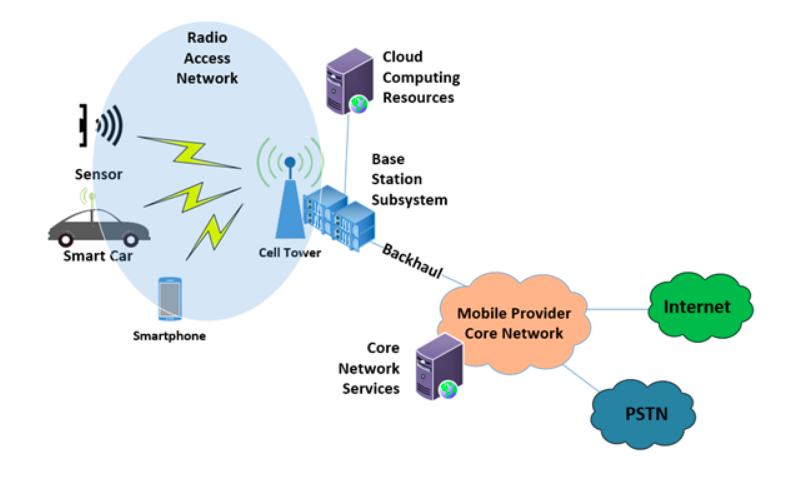
      
    In a 5G RAN, the antenna and supporting software support 5G New Radio (NR), a RAT used by 5G networks. Nodes specific to the 5G RAN are called gNBs. They are responsible for all functions related to radio technology. The gNB nodes support NR devices via the NR user plane and control plane protocols.

 **Backhoul:** 
        
    The backhaul of a network consists of links from the core network to subnetworks. In 5G, the mobile network must be linked to the wired network through the backhaul. Thus, 5G backhaul refers to the signal between the 5G core and remote sites or networks.
    The 5G backhaul will need to support a large bandwidth of devices and data, up to hundreds of gigabits of traffic from the core network. Building an efficient backhaul is critical to 5G to enable high speeds, large capacities and opening up a high bandwidth for numerous connected devices.Nowadays users demand faster speeds, quicker downloads, and quality internet connections everywhere they go. 5G backhaul enables devices to wirelessly connect wherever they are. Additionally, any type of device can connect including smart phones, smart cities, industrial equipment and medical devices.

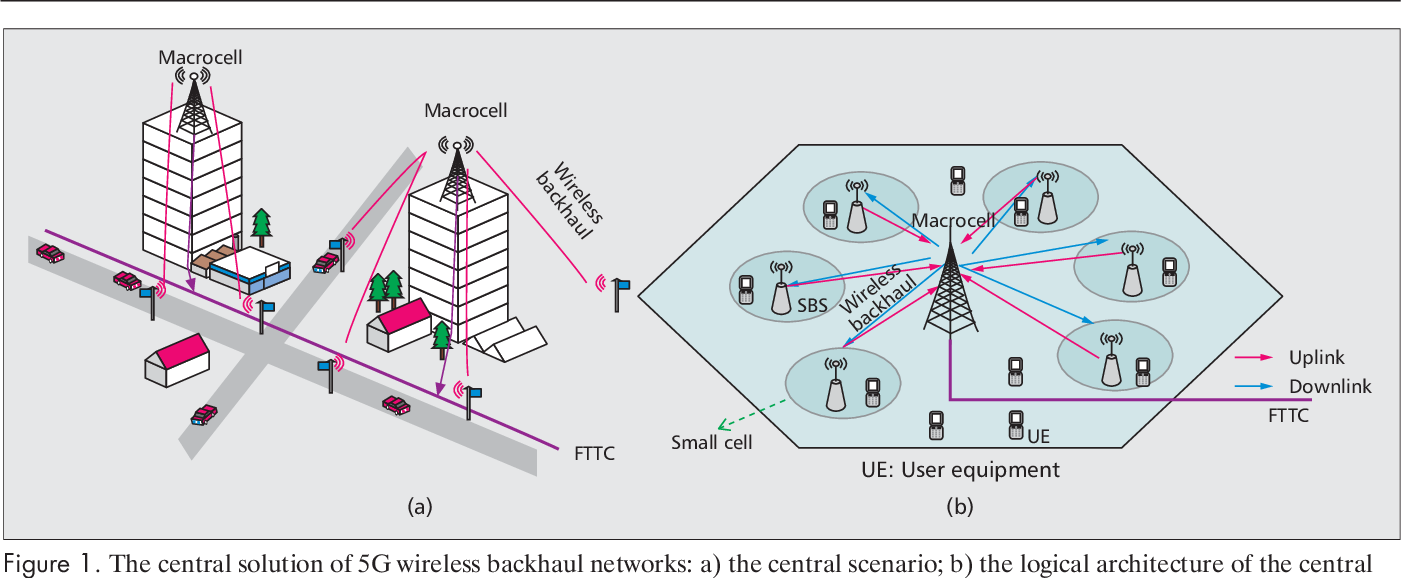


### Geotype Cost Per km Bar Plot

In [58]:
geo_cost_bar = px.bar(df, x="geotype", y="cost", color='area_km2', title="Geotype Cost Per km Bar Plot",
labels={'pop':'strategy'}, height=400)
geo_cost_bar.update_layout(title_x=0.5)

geo_cost_bar.show()

### Geotype Cost for Scenarios Bar Plot

In [60]:
geo_cost_bar = px.bar(df, x="geotype", y="cost", color='scenario', title="Geotype Cost for Scenarios Bar Plot",
labels={'pop':'strategy'}, height=400)
geo_cost_bar.update_layout(title_x=0.5)

geo_cost_bar.show()